# Results from supplementary materials

In [1]:
import pandas as pd
import numpy as np
from math import log

import re

import matplotlib.pyplot as plt
import seaborn as sns

% load_ext rpy2.ipython
% matplotlib inline

In [3]:
## set attributes for plots

# set colours
cat_colours = sns.xkcd_palette(["cerulean", "goldenrod", "red", "grass green"])
chain_colours = sns.color_palette("hls")

# set font
sns.set(font_scale=1.2)

# set linewidth
sns.set_context(rc={"lines.linewidth":1.2, "patch.linewidth": 0})


In [4]:
%%R 

library("lme4")
library("lmerTest")
library("ggplot2")

In [5]:
# function to make printing from R output faster

def print_output(output):
    
    for line in output:
        
        print line

In [6]:
# read in data files 
ex1 = pd.read_csv("../data_files/ex1.csv")
ex2 = pd.read_csv("../data_files/ex2.csv")
ex3 = pd.read_csv("../data_files/ex3.csv")

In [7]:
cols_order = ['Transmission + Interaction', 'Interaction only', 'Transmission only']

## Contents

1. <a href='#func'>Functions used in notebook</a>
2. <a href='#gest-dist'>Gesture shape distributions</a>
3. <a href='#acc'>Communicative accuracy</a>
 * <a href='#acc-ex2'>Experiment 2</a>
 * <a href='#acc-ex3'>Experiment 3</a>
4. <a href='#align'>Within-generation similarity (alignment)</a>
 * <a href='#align-ex2'>Experiment 2</a>
 * <a href='#align-ex3'>Experiment 3</a>
5. <a href='#learn'>Between-generation similarity (learnability)</a>
 * <a href='#learn-ex2'>Experiment 2</a>
 * <a href='#learn-ex2'>Experiment 3</a>

<a id='func'></a>

## 1. Functions used in notebook

In [8]:
# same shape list function as used for entropy
# used to get list of gesture shapes for a given meaning

def shape_list(alist,reg):
    #join list of code
    allcode=(',').join(alist)
    #search for gesture shapes (expressions starting with 1h or 2h)
    regex=re.compile(reg)
    setlist=re.findall(regex,allcode)
    #return the list of shapes and the set of different shapes
    return setlist, set(setlist)


In [9]:
# for the shapes provided by the function above, get frequency of each shape to draw a histogram

def shape_freq(shape_set):
    frequencies = []
    for shape in shape_set[1]:
        shape_freq = shape_set[0].count(shape)
        frequencies.append(shape_freq)
    return sorted(frequencies, reverse = True)

In [10]:
#for two sets of shapes (extracted from code), converts the set to binary values and finds
#jaccard coefficient

def jaccard_index(setA,setB):
    A=len(list(setA))
    B=len(list(setB))
    AB=len(list(setA.intersection(setB)))
    denom=float(A+B-AB)
    if denom==0:
        j_ind=float('nan')
    else:
        j_ind=AB/denom
    return j_ind
    

In [11]:
# regular expression to extract shape codes
reg = r'1h.*?\b|2h.*?\b'

<a id='gest-dist'></a>

## 2. Gesture shape distributions

The plot generated by the code below shows the distributions of gesture shapes over generations in each chain of experiment 1. From the plot, we can see that the trajectories of these distributions are similar across chains. Initially, participants use lots of different gesture shapes at low frequencies; over generations, they increasingly use a smaller pool of gesture shapes that are re-used more frequently.

In [12]:

# use functions above to get frequencies and draw histograms

def shape_hist(data, ch, gen, g):
    
    list_o_shapes = list(data[(data['chain']== 'chain' +str(ch))&(data['generation']== gen)]['code_string'].dropna())
    
    shape_set = shape_list(list_o_shapes,reg)

    shapes_freq = shape_freq(shape_set)
    
    max_freq = max(shapes_freq)
    
    set_len = range(len(shape_set[1]))
    
    ## to add to figure array (below) 
    
    axarr[ch-1][g].bar(set_len , shapes_freq, color = c1[ch-1], label = 'Chain ' + str(ch))

    axarr[ch-1][g].set_ylim(0, 23)
    
    axarr[ch-1][g].set_xlim(-0.5,40)
    
    axarr[ch-1][g].tick_params(labelsize = 20)
    
    axarr[ch-1][g].set_xticks(range(0,41,10))
    
    if ch==5:
        axarr[ch-1][g].set_xlabel('Generation ' + str(g), fontsize = 20)
        
    return max_freq
    

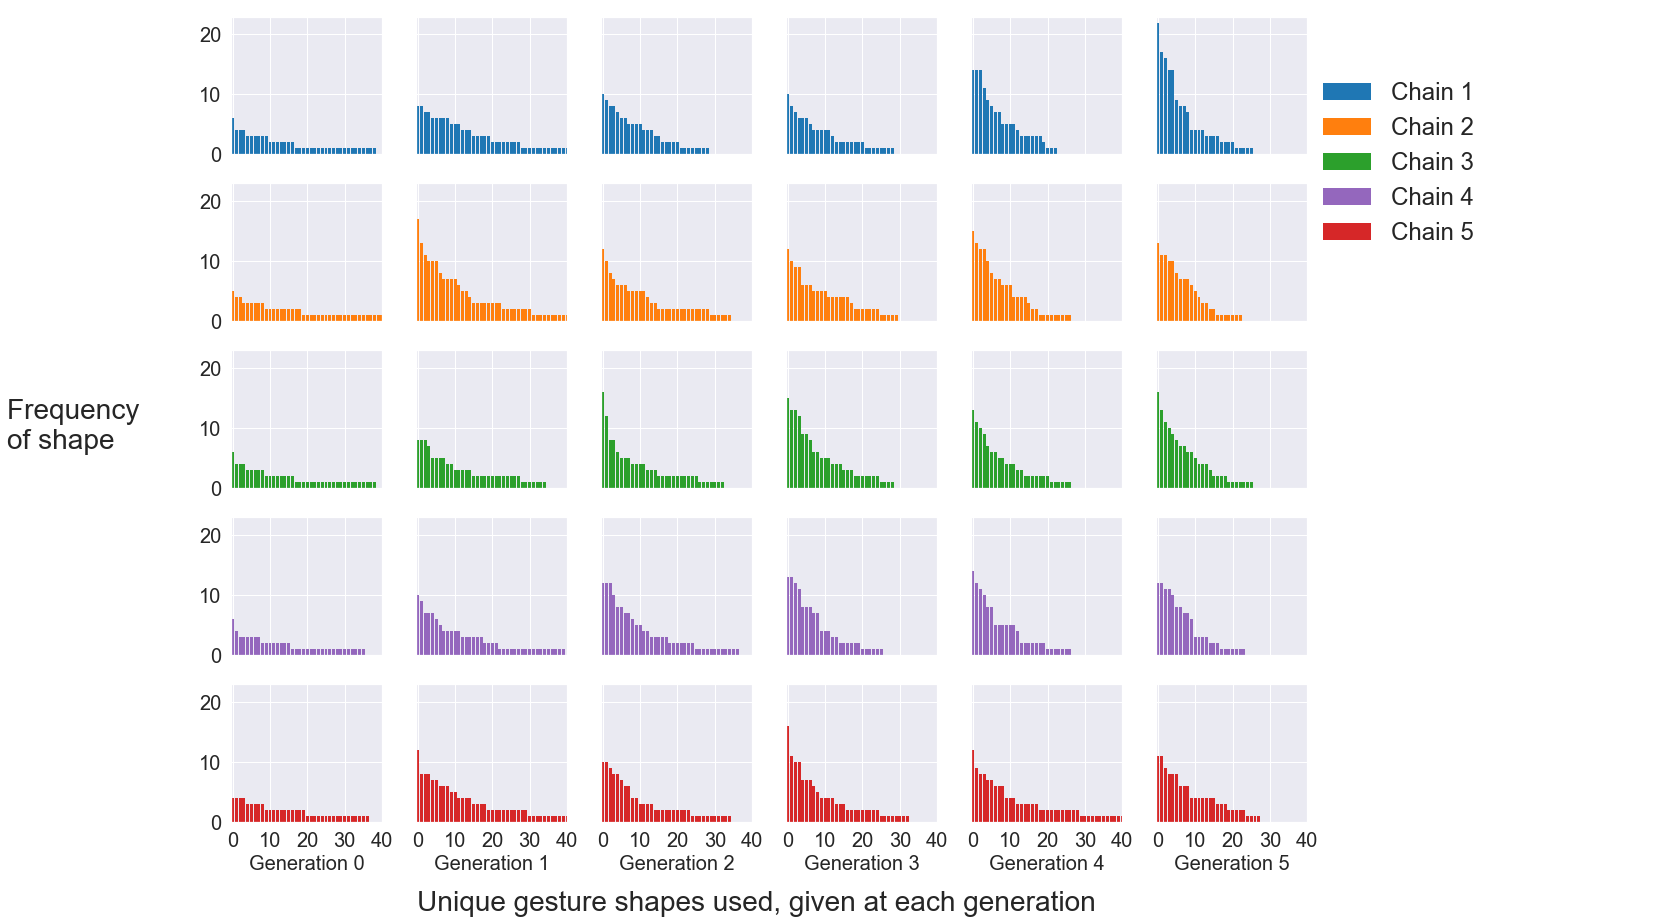

In [61]:
# produce histograms for each chain

#colour list for charts
c1=['#1f77b4','#ff7f0e','#2ca02c','#9467bd','#d62728']

sns.set_style('darkgrid')

fig, axarr = plt.subplots(nrows=5, ncols=6, figsize = (16, 12), sharex = True,
                          sharey = True)

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
txt1 = fig.text(0.5, -0.06, 'Unique gesture shapes used, given at each generation', 
                ha='center', fontsize = 28)
txt2 = fig.text(-0.15, 0.5, 'Frequency \nof shape', va='center', fontsize = 28)

import matplotlib.patches as mpatches
ch_patches = []
for ch in [1, 2, 3, 4, 5]:
    ch_patch = mpatches.Patch(color=c1[ch-1], label='Chain '+str(ch))
    ch_patches.append(ch_patch)

lgd = fig.legend(ch_patches, ('Chain 1','Chain 2','Chain 3','Chain 4','Chain 5'), 
                 fontsize =24, loc='upper left', bbox_to_anchor=(1.13, 1), framealpha=0)
    

gens = [0, 1, 2, 3, 4, 5]

y_lims = []

for chain in [1, 2, 3, 4, 5]:
    for generation in gens:
        gs = gens.index(generation)
        lims = shape_hist(ex1, chain, generation, gs)
        y_lims.append(lims)

plt.savefig('../../all_ent_ex1.jpg', bbox_inches='tight')

<a id='acc'></a>

## 3. Communicative accuracy

<a id='acc-ex2'></a>

### Experiment 2

In [15]:
ex2_acc = ex2[(ex2.condition!='Transmission only') & (ex2.generation!=0)]

The plot below shows the communicative accuracy at each generation/round for each chain/pair in the transmission + interaction and interaction-only conditions of experiment 2.

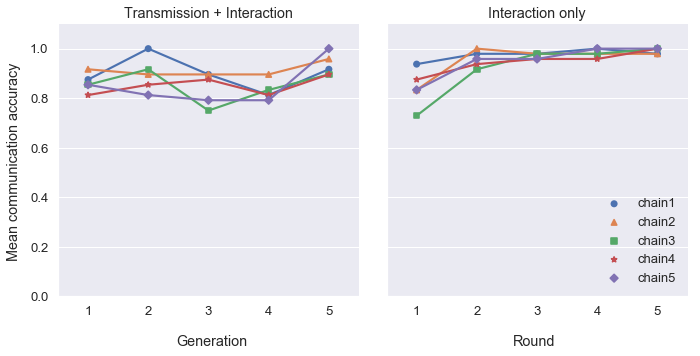

In [62]:
ex2_acc_plot = sns.factorplot(x = "generation", y = "acc",
                         hue = "chain", col='condition', data =ex2_acc,
                         size = 5, aspect = 1, ci=None, legend=False,
                                markers=['o', '^', 's', '*', 'D'])

ex2_acc_plot.set(xlabel = "", ylabel = "",
            ylim = (0,1.1), xticklabels=[1,2,3,4,5])

plt.legend(fontsize=13, loc = 'lower right', framealpha=0)

ex2_acc_plot.set_titles('{col_name}')

plt.text(-6.8, 0.9, "Mean communication accuracy", rotation=90)

plt.text(-4, -0.2, 'Generation')
plt.text(1.6, -0.2, 'Round')

plt.savefig('../../ex2_acc.jpg', bbox_inches='tight')

Below, we run a logistic mixed effects model, looking at the effect of condition and generation on communicative accuracy.

**Outcome variable:**
* communicative accuracy

**Fixed effects:**
* condition
* generation
* condition * generation

**Random effects:**
 * chain (random intercept, random slope of generation)
 * participant (random intercept, nested in chains)
 * target meaning (random intercept)

In [15]:
%R -i ex2_acc

In [16]:
%%R

ex2_acc$generation = ex2_acc$generation - 1
ex2_acc$condition = relevel(ex2_acc$condition, 'Transmission + Interaction')

In [17]:
%%R

ex2_acc_model= glmer(acc~generation*condition + (1+generation|chain) +
                             (1|participant:chain) + (1|target), data=ex2_acc, 
                             family='binomial', control =glmerControl(optimizer='bobyqa'))

In [18]:
ex2_acc_model = %R capture.output(summary(ex2_acc_model))

print_output(ex2_acc_model)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: acc ~ generation * condition + (1 + generation | chain) + (1 |  
    participant:chain) + (1 | target)
   Data: ex2_acc
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  1313.3   1365.3   -647.6   1295.3     2391 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-16.0716   0.1064   0.2539   0.3485   0.8107 

Random effects:
 Groups            Name        Variance Std.Dev. Corr 
 participant:chain (Intercept) 0.108419 0.32927       
 target            (Intercept) 0.390949 0.62526       
 chain             (Intercept) 0.127333 0.35684       
                   generation  0.005838 0.07641  -1.00
Number of obs: 2400, groups:  participant:chain, 60; target, 24; chain, 5

Fixed effects:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           1

The model demonstrates no effect of generation for the baseline condition (transmission + interaction). However, we do find a significant interaction between generation and condition, such that accuracy shows a greater increase over generations for the interaction only condition than for the baseline.

In [19]:
# overall mean accuracy

ex2_acc[['condition', 'acc']].groupby('condition').agg(np.mean).reset_index()

,condition,acc
0,Interaction only,0.949167
1,Transmission + Interaction,0.872500


<a id='acc-ex3'></a>

### Experiment 3

In [34]:
ex3_acc = ex3[(ex3.condition!='Transmission only') & (ex3.generation!=0)]

The plot below shows the communicative accuracy at each generation/round for each chain/pair in the transmission + interaction and interaction-only conditions of experiment 3.

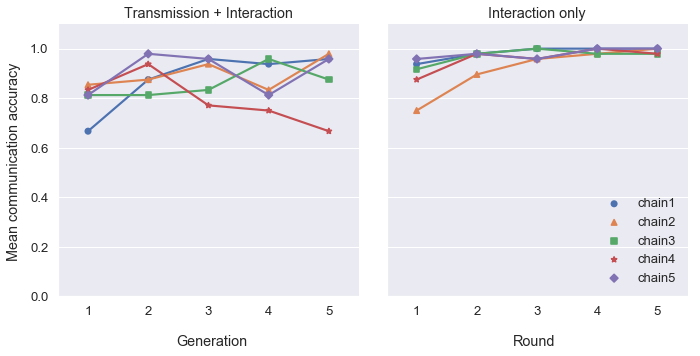

In [63]:
ex3_acc_plot = sns.factorplot(x = "generation", y = "acc",
                         hue = "chain", col='condition', data =ex3_acc,
                         size = 5, aspect = 1, ci=None, legend=False,
                                markers=['o', '^', 's', '*', 'D'])

ex3_acc_plot.set(xlabel = "", ylabel = "",
            ylim = (0,1.1), xticklabels =[1,2,3,4,5])

plt.legend(fontsize=13, loc='lower right', framealpha=0)

ex3_acc_plot.set_titles('{col_name}')

plt.text(-6.8, 0.9, "Mean communication accuracy", rotation=90)

plt.text(-4, -0.2, 'Generation')
plt.text(1.6, -0.2, 'Round')

plt.savefig('../../ex3_acc.jpg', bbox_inches='tight')

Below, we run a logistic mixed effects model, looking at the effect of condition and generation on communicative accuracy.

Model structure here is the same as for experiment 2.

**Outcome variable:**
* communicative accuracy

**Fixed effects:**
* condition
* generation
* condition * generation

**Random effects:**
 * chain (random intercept, random slope of generation)
 * participant (random intercept, nested in chains)
 * target meaning (random intercept)

In [22]:
%R -i ex3_acc

In [23]:
%%R 

ex3_acc$generation = ex3_acc$generation - 1
ex3_acc$condition = relevel(ex3_acc$condition, "Transmission + Interaction")

In [24]:
%%R

ex3_acc_model= glmer(acc~generation*condition + (1+generation|chain) +
                             (1|participant:chain) + (1|target), data=ex3_acc, 
                             family='binomial', control =glmerControl(optimizer='bobyqa'))

In [25]:
ex3_acc_model = %R capture.output(summary(ex3_acc_model))

print_output(ex3_acc_model)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: acc ~ generation * condition + (1 + generation | chain) + (1 |  
    participant:chain) + (1 | target)
   Data: ex3_acc
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
  1263.3   1315.4   -622.7   1245.3     2391 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-15.9743   0.1009   0.2292   0.3461   0.7911 

Random effects:
 Groups            Name        Variance Std.Dev. Corr 
 participant:chain (Intercept) 0.18686  0.4323        
 target            (Intercept) 0.22716  0.4766        
 chain             (Intercept) 0.03690  0.1921        
                   generation  0.06804  0.2608   -1.00
Number of obs: 2400, groups:  participant:chain, 60; target, 24; chain, 5

Fixed effects:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                            

As with experiment 2, the model here demonstrates no significant effect of generation for the Transmission + Interaction condition, but does show a significant interaction between generation and condition. Accuracy increases over generations in the interaction-only condition, relative to the transmission + interaction condition.

In [40]:
# overall mean accuracy

ex3_acc[['condition', 'acc']].groupby('condition').agg(np.mean).reset_index()

,condition,acc
0,Interaction only,0.961667
1,Transmission + Interaction,0.865833


<a id='align'></a>

## 4. Within-generation similarity (alignment)

In this section, we measure within-generation gesture similarity, using the Jaccard Index between two sets of gestures, given as


$ J(A,B) = \frac{|A \cap B|}{|A \cup B| }$

or, the intersection of two sets, divided by the union of two sets. This gives us a measure of alignment between two communicating participants in the experiments. As such, this measure is only applied to conditions where interaction between two participants is at play.

In [41]:
#for a particular generation and chain, extracts gesture code and takes the set of shapes used
#by each participant, and performs above operations to give jaccard coeffecient for each target

def jaccard_alignment(df):
    
    global reg
    
    align_df = pd.DataFrame()
    
    for chain in df.chain.unique():
        
        for gen in df.generation.unique():
            
            subset = df[(df.chain==chain) &
                       (df.generation==gen)]
            
            for word in subset.target.unique():
                
                shape_sets = []
                
                for p in subset.participant.unique():
                    
                    try:
                        word_set = subset[(subset.target==word) &
                                     (subset.participant==p)]['code_string'].iloc[0]
                    
                    except:
                        
                        word_set = np.nan
                        
                    if pd.isnull(word_set):
                        
                        shape_sets.append(np.nan)
                        
                    else:
                        word_list = word_set.split(',')
                        
                        shape_sets.append(shape_list(word_list, reg)[1])

                if np.nan not in shape_sets:
                    
                    j_ind = jaccard_index(shape_sets[0],
                                         shape_sets[1])
                        
                else:
                    
                    j_ind = np.nan
                    
                row_dict = {'chain': chain, 'generation': gen,
                           'target': word, 'jaccardIndex': j_ind}
                
                
                align_df = align_df.append(row_dict, ignore_index=True)
                
    return align_df
                
    


<a id='align-ex2'></a>

### Experiment 2

In [42]:
# get alignment for dyads, full

align_pieces = []

for con in ['Transmission + Interaction', 'Interaction only']:
    
    con_df = ex2[(ex2.condition==con) &
                   (ex2.generation!=0)]
    
    j_df = jaccard_alignment(con_df)
    
    j_df['condition'] = con
    
    align_pieces.append(j_df)
    
ex2_align= pd.concat(align_pieces, ignore_index=True)
    
    

Plot showing mean jaccard index of gesture sets between communication partners in each chain for each condition of experiment 2.

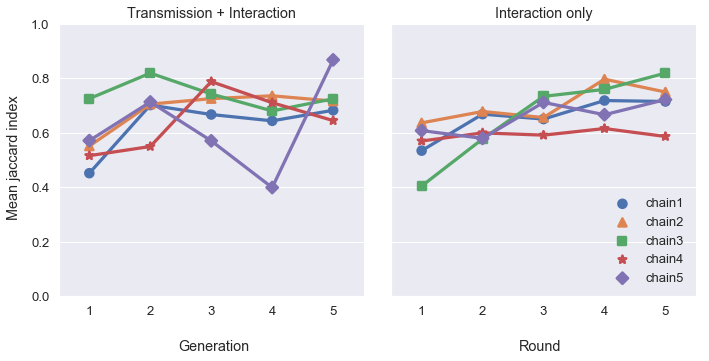

In [64]:
align_ex2_plot = sns.factorplot(y='jaccardIndex', x='generation', hue='chain',
              data=ex2_align,
                                   col='condition', size=5, aspect=1,
                                   ci=None, legend=False,
                                  markers=['o', '^', 's', '*', 'D'], scale=1.5)

align_ex2_plot.set(ylim=(0,1), ylabel='', xlabel='',
                      xticklabels=[1,2,3,4,5])

plt.legend(loc = 'lower right', fontsize=13, framealpha=0)

align_ex2_plot.set_titles('{col_name}')

plt.text(-6.8, 0.7, 'Mean jaccard index', rotation=90)

plt.text(-4, -0.2, 'Generation')
plt.text(1.6, -0.2, 'Round')

plt.savefig('../../ex2_align.jpg', bbox_inches='tight')

The linear mixed effects model below measures the effect of generation and condition on within-generation similarity for experiment 2. Note that participant is not included in the random effects structure of the model, as we get a single value of gesture similarity for each communicating pair (e.g. each generation).

**Output variable:**
 * within-generation similarity

**Fixed effects:**
 * condition
 * generation
 * condition * generation
 
**Random effects:**
 * chain (random intercept, random slope of generation)
 * target meaning

In [30]:
%R -i ex2_align

In [31]:
%%R

# shift generations so starts at 0
ex2_align$generation = ex2_align$generation - 1

ex2_align$condition = relevel(ex2_align$condition, 'Transmission + Interaction')

In [32]:
%%R

model_ex2_align = lmer(jaccardIndex~generation * condition + (1+generation|chain) + 
                              (1|target), data=ex2_align, control=lmerControl(optimizer='bobyqa'))


In [33]:
model_ex2_align = %R capture.output(summary(model_ex2_align))

print_output(model_ex2_align)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: jaccardIndex ~ generation * condition + (1 + generation | chain) +  
    (1 | target)
   Data: ex2_align
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 899.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6279 -0.7924  0.2470  0.8663  1.6753 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr
 target   (Intercept) 1.161e-02 0.107735     
 chain    (Intercept) 3.697e-04 0.019227     
          generation  2.334e-05 0.004831 1.00
 Residual             1.175e-01 0.342809     
Number of obs: 1192, groups:  target, 24; chain, 5

Fixed effects:
                                       Estimate Std. Error         df t value
(Intercept)                             0.61095    0.03391   47.10692  18.015
generation                              0.02672    0.01015   78.60556   2.634
conditionInteraction only              -0.04195    0.03435 1161.01977

The model above demonstrates a main effect of generation, but no interaction between generation and condition. As such, we find that participants become increasingly aligned over generations, in both conditions of the experiment.

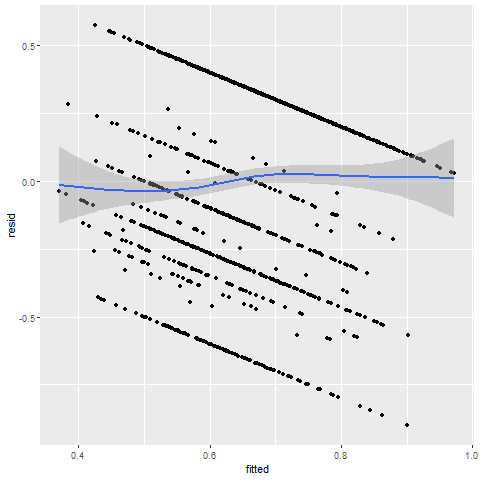

In [34]:
%%R 

model_ex2_df = data.frame('fitted' = fitted(model_ex2_align), 'resid'=resid(model_ex2_align))

ggplot(model_ex2_df, aes(fitted, resid)) + geom_point() + stat_smooth()

# plot of residuals


<a id='align-ex3'></a>

### Experiment 3

In [47]:
# get alignment for dyads, full

align_pieces = []

for con in ['Transmission + Interaction', 'Interaction only']:
    
    con_df = ex3[(ex3.condition==con) &
                   (ex3.generation!=0)]
    
    j_df = jaccard_alignment(con_df)
    
    j_df['condition'] = con
    
    align_pieces.append(j_df)
    
ex3_align= pd.concat(align_pieces, ignore_index=True)
    

Plot showing mean jaccard index of gesture sets between communication partners in each chain for each condition of experiment 3.

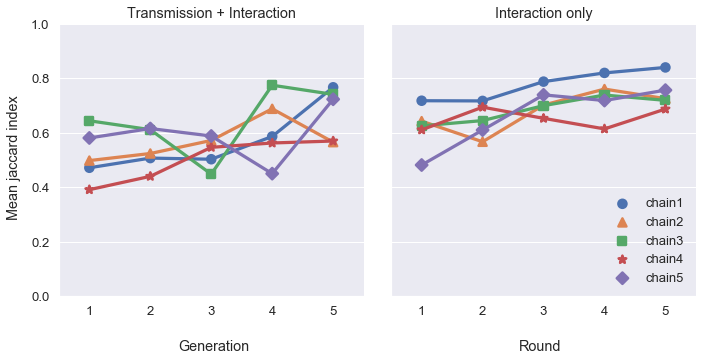

In [65]:
align_ex3_plot = sns.factorplot(y='jaccardIndex', x='generation', hue='chain',
              data=ex3_align,
                                   col='condition', size=5, aspect=1,
                                   ci=None, legend=False,
                                  markers=['o', '^', 's', '*', 'D'],
                                  scale=1.5)

align_ex3_plot.set(ylim=(0,1), ylabel='', xlabel='',
                      xticklabels=[1,2,3,4,5])

plt.legend(loc = 'lower right', fontsize=13, framealpha=0)

align_ex3_plot.set_titles('{col_name}')

plt.text(-6.8, 0.7, 'Mean jaccard index', rotation=90)

plt.text(-4, -0.2, 'Generation')
plt.text(1.6, -0.2, 'Round')

plt.savefig('../../ex3_align.jpg', bbox_inches='tight')

The linear mixed effects model below measures the effect of generation and condition on within-generation similarity for experiment 2. Note that participant is not included in the random effects structure of the model, as we get a single value of gesture similarity for each communicating pair (e.g. each generation).

The model structure here is the same as for experiment 2.

**Output variable:**
 * within-generation similarity

**Fixed effects:**
 * condition
 * generation
 * condition * generation
 
**Random effects:**
 * chain (random intercept, random slope of generation)
 * target meaning

In [37]:
%R -i ex3_align

In [38]:
%%R

ex3_align$generation = ex3_align$generation - 1

ex3_align$condition = relevel(ex3_align$condition, 'Transmission + Interaction')

In [39]:
%%R

model_ex3_align = lmer(jaccardIndex~generation * condition + (1+generation|chain) + 
                              (1|target), data=ex3_align, control=lmerControl(optimizer='bobyqa'))


In [40]:
model_ex3_align = %R capture.output(summary(model_ex3_align))

print_output(model_ex3_align)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: jaccardIndex ~ generation * condition + (1 + generation | chain) +  
    (1 | target)
   Data: ex3_align
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 628.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6235 -0.7837  0.1174  0.7897  2.3699 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr
 target   (Intercept) 1.600e-02 0.126487     
 chain    (Intercept) 4.651e-04 0.021567     
          generation  3.201e-05 0.005658 1.00
 Residual             9.237e-02 0.303918     
Number of obs: 1197, groups:  target, 24; chain, 5

Fixed effects:
                                       Estimate Std. Error         df t value
(Intercept)                           4.980e-01  3.495e-02  3.944e+01  14.249
generation                            3.847e-02  9.153e-03  4.799e+01   4.203
conditionInteraction only             1.245e-01  3.040e-02  1.166e+03

As with experiment 2, the model above demonstrates a main effect of generation, but no interaction between generation and condition. We find that participants become increasingly aligned over generations, in both conditions of the experiment.

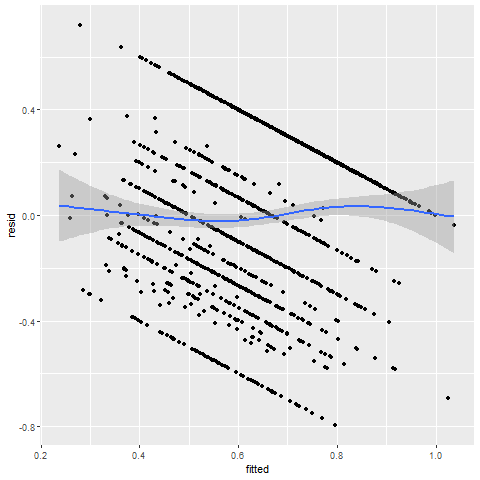

In [41]:
%%R

model_ex3_df = data.frame('fitted' = fitted(model_ex3_align),
                                 'resid' = resid(model_ex3_align))

ggplot(model_ex3_df, aes(fitted, resid)) + geom_point() + stat_smooth()

<a id='learn'></a>

## 5. Between-generation similarity (learnability)

Between-generation similarity is calculated in the same way as within-generation similarity, using the Jaccard index as a measure. However, the measure is applied to gestures from participants at generation *n* and their training model at generation *n-1*, to give a measure of how well participants reproduce the gestures they saw  in training. As such, this measure is only applied to conditions where transmission is at play.

In [50]:
#for a particular generation and chain, extracts gesture code and takes the set of shapes used
#by each participant, and performs above operations to give jaccard coeffecient for each target

# for each participant at a generation, it compares their gestures to the gestures of their training model

def jaccard_learn(df):
    
    global reg
    
    align_df = pd.DataFrame()
    
    for chain in df.chain.unique():
        
        for gen in range(1, 6):
            
            subset = df[(df.chain==chain) &
                       (df.generation==gen)]
            
            for word in subset.target.unique():
                
                model = subset[subset.target==word].model.unique()[0]
                
                # get model code
                
                try:
                    model_code = df[(df.chain==chain) &
                                   (df.generation==gen-1) &
                                    (df.target==word) &
                                   (df.participant==model)]['code_string'].iloc[0]
                    
                except:
                    
                    model_code = np.nan

                    
                for p in subset.participant.unique():
                    
                    try:
                        word_set = subset[(subset.target==word) &
                                     (subset.participant==p)]['code_string'].iloc[0]
                    
                    except:
                        
                        word_set = np.nan
                        
                    if pd.isnull(word_set) or pd.isnull(model_code):
                        
                        j_ind = np.nan
                        
                    else:
                        
                        shape_sets = []
                        
                        for code in [word_set, model_code]:
                            
                            code_list = code.split(',')
                        
                            shape_sets.append(shape_list(code_list, reg)[1])
                            
                        j_ind = jaccard_index(shape_sets[0], shape_sets[1])

    
                    
                    row_dict = {'chain': chain, 'generation': gen,
                                'participant': p, 'model': model,
                           'target': word, 'jaccardIndex': j_ind}
                
                
                    align_df = align_df.append(row_dict, ignore_index=True)
                    
    return align_df
                
    


<a id='learn-ex2'></a>

### Experiment 2

In [51]:
ex2_learn_pieces = []

for con in ['Transmission + Interaction', 'Transmission only']:
    
    con_subset = ex2[ex2.condition==con]
    
    con_learn = jaccard_learn(con_subset)
    
    con_learn['condition'] = con
    
    ex2_learn_pieces.append(con_learn)
    

ex2_learn = pd.concat(ex2_learn_pieces, ignore_index=True)

Plot showing the between generation similarity at each generation of each chain, for each transmission condition of experiment 2.

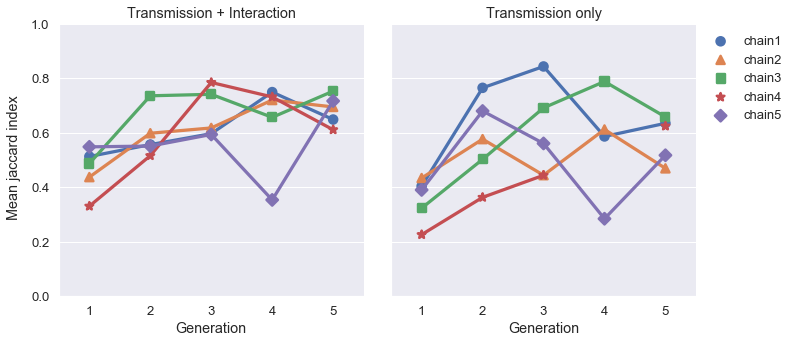

In [66]:
learn_ex2_plot = sns.factorplot(y='jaccardIndex', x='generation', hue='chain',
              data=ex2_learn,
                                   col='condition', size=5, aspect=1,
                                   ci=None, legend=False,
                                  markers=['o', '^', 's', '*', 'D'],
                                  scale=1.5)

learn_ex2_plot.set(ylim=(0,1), ylabel='', xlabel='Generation',
                      xticklabels=[1,2,3,4,5])

plt.legend(bbox_to_anchor=(1,1), fontsize=13, framealpha=0)

learn_ex2_plot.set_titles('{col_name}')

plt.text(-6.8, 0.7, 'Mean jaccard index', rotation=90)

plt.savefig('../../ex2_sim.jpg', bbox_inches='tight')

The linear mixed effects model below measures the effect of generation and condition on between-generation similarity for experiment 2. This time, we can include the random effect of participant, as we get a measure from each participant, of how similar their gesture set is to that of their training model.

**Output variable:**
 * between-generation similarity

**Fixed effects:**
 * condition
 * generation
 * condition * generation
 
**Random effects:**
 * chain (random intercept, random slope of generation)
 * participant (random intercept, nested within chains)
 * target meaning

In [55]:
%R -i ex2_learn

In [56]:
%%R

# shift generations so starts at 0
ex2_learn$generation = ex2_learn$generation - 1

ex2_learn$condition = relevel(ex2_learn$condition, 'Transmission + Interaction')

In [57]:
%%R

learn_model_ex2 = lmer(jaccardIndex~generation * condition + (1+generation|chain) +
                              (1|participant:chain) + (1|target), data=ex2_learn,
                              control=lmerControl(optimizer='bobyqa'))

In [58]:
ex2_model_learn = %R capture.output(summary(learn_model_ex2))

print_output(ex2_model_learn)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: jaccardIndex ~ generation * condition + (1 + generation | chain) +  
    (1 | participant:chain) + (1 | target)
   Data: ex2_learn
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 1240.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.27976 -0.79346  0.00284  0.86341  2.70148 

Random effects:
 Groups            Name        Variance  Std.Dev. Corr 
 participant:chain (Intercept) 0.0093039 0.09646       
 target            (Intercept) 0.0134499 0.11597       
 chain             (Intercept) 0.0018342 0.04283       
                   generation  0.0004398 0.02097  -0.57
 Residual                      0.1077480 0.32825       
Number of obs: 1765, groups:  participant:chain, 74; target, 24; chain, 5

Fixed effects:
                                       Estimate Std. Error        df t value
(Intercept)                            0.511587   0.041907 1

The above model reveals a significant effect of generation, and no interaction between generation and condition. Participants across both conditions of experiment 2 are increasingly able to faithfully reproduce the gestures they saw in training, suggesting that the gestures adapt to become more learnable.

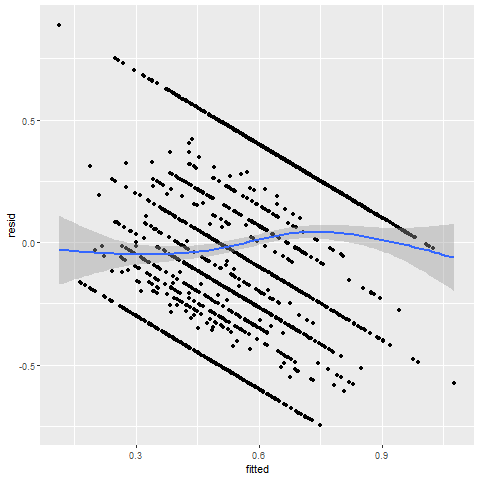

In [49]:
%%R

model_ex2_learn_df = data.frame('fitted'=fitted(learn_model_ex2),
                                  'resid'=resid(learn_model_ex2))

ggplot(model_ex2_learn_df, aes(fitted, resid)) + geom_point() + stat_smooth()

<a id='learn-ex3'></a>

### Experiment 3

In [59]:
ex3_learn_pieces = []

for con in ['Transmission + Interaction', 'Transmission only']:
    
    con_subset = ex3[ex3.condition==con]
    
    con_learn = jaccard_learn(con_subset)
    
    con_learn['condition'] = con
    
    ex3_learn_pieces.append(con_learn)
    

ex3_learn = pd.concat(ex3_learn_pieces, ignore_index=True)

Plot showing the between generation similarity at each generation of each chain, for each transmission condition of experiment 2.

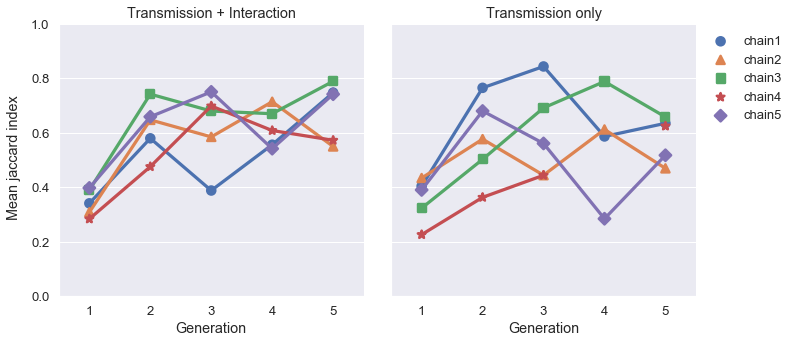

In [67]:
learn_ex3_plot = sns.factorplot(y='jaccardIndex', x='generation', hue='chain',
              data=ex3_learn,
                                   col='condition', size=5, aspect=1,
                                   ci=None, legend=False,
                                  markers=['o', '^', 's', '*', 'D'],
                                  scale=1.5)

learn_ex3_plot.set(ylim=(0,1), ylabel='', xlabel='Generation',
                      xticklabels=[1,2,3,4,5])

plt.legend(bbox_to_anchor=(1,1), fontsize=13, framealpha=0)

learn_ex3_plot.set_titles('{col_name}')

plt.text(-6.8, 0.7, 'Mean jaccard index', rotation=90)

plt.savefig('../../ex3_sim.jpg', bbox_inches='tight')

The linear mixed effects model below measures the effect of generation and condition on between-generation similarity for experiment 2. This time, we can include the random effect of participant, as we get a measure from each participant, of how similar their gesture set is to that of their training model.

The model structure here is the same as that for experiment 2.

**Output variable:**
 * between-generation similarity

**Fixed effects:**
 * condition
 * generation
 * condition * generation
 
**Random effects:**
 * chain (random intercept, random slope of generation)
 * participant (random intercept, nested within chains)
 * target meaning

In [52]:
%R -i ex3_learn

In [53]:
%%R

ex3_learn$generation = ex3_learn$generation - 1
ex3_learn$condition = relevel(ex3_learn$condition, "Transmission + Interaction")

In [54]:
%%R

learn_model_ex3 = lmer(jaccardIndex~generation * condition + (1+generation|chain) +
                              (1|participant:chain) + (1|target), data=ex3_learn,
                              control=lmerControl(optimizer='bobyqa'))


In [55]:
learn_model_rerun = %R capture.output(summary(learn_model_ex3))

print_output(learn_model_rerun)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: jaccardIndex ~ generation * condition + (1 + generation | chain) +  
    (1 | participant:chain) + (1 | target)
   Data: ex3_learn
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 790

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.56987 -0.76820 -0.09421  0.80375  2.69611 

Random effects:
 Groups            Name        Variance  Std.Dev. Corr
 participant:chain (Intercept) 1.299e-02 0.113993     
 target            (Intercept) 1.158e-02 0.107602     
 chain             (Intercept) 1.123e-03 0.033504     
                   generation  4.993e-06 0.002235 1.00
 Residual                      8.886e-02 0.298099     
Number of obs: 1475, groups:  participant:chain, 74; target, 24; chain, 5

Fixed effects:
                                       Estimate Std. Error        df t value
(Intercept)                            0.444625   0.042244 19.336526 

Similar to experiment 2, this model reveals a significant effect of generation, and no interaction between generation and condition. Participants across both conditions of experiment 3 are increasingly able to faithfully reproduce the gestures they saw in training, suggesting that the gestures adapt to become more learnable.

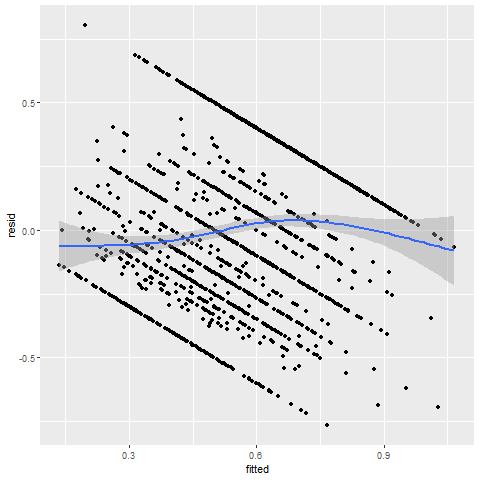

In [56]:
%%R

model_ex3_learn_df = data.frame('fitted'=fitted(learn_model_ex3),
                                  'resid'=resid(learn_model_ex3))

ggplot(model_ex3_learn_df, aes(fitted, resid)) + geom_point() + stat_smooth()